In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_context('talk')

# Data

In [3]:
url = "https://raw.githubusercontent.com/jehyunlee/jehyunlee.github.io/master/about/src/2022_kses/complete_dataset.csv"
df = pd.read_csv(url)
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [4]:
df['date'].max()

'2020-10-06'

## Data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


## Feature selection
근거가 없음 추후 분석예정

In [12]:
col = ['date','demand','school_day','holiday']
df_fs = df[col]
df_fs['date'] = pd.to_datetime(df_fs['date'])
df_fs = df_fs.set_index('date')
df_fs.head()

,demand,school_day,holiday
date,,,
2015-01-01,99635.030,N,Y
2015-01-02,129606.010,N,N
2015-01-03,142300.540,N,N
2015-01-04,104330.715,N,N
2015-01-05,118132.200,N,N


## train, valid, test split
2015/01/01 ~ 2020/10/6

In [14]:
years = df_fs.index.year

df_Train = df_fs.loc[years<= 2019]
df_test = df_fs.loc[years== 2020]

df_train = df_fs.loc[years <= 2018]
df_valid = df_fs.loc[years == 2019]

In [16]:
df_train

,demand,school_day,holiday
date,,,
2015-01-01,99635.030,N,Y
2015-01-02,129606.010,N,N
2015-01-03,142300.540,N,N
2015-01-04,104330.715,N,N
2015-01-05,118132.200,N,N
...,...,...,...
2018-12-27,129749.140,N,N
2018-12-28,133831.375,N,N
2018-12-29,108290.110,N,N


In [17]:
df_test

,demand,school_day,holiday
date,,,
2020-01-01,89077.855,N,Y
2020-01-02,102988.185,N,N
2020-01-03,118922.215,N,N
2020-01-04,102245.610,N,N
2020-01-05,95671.200,N,N
...,...,...,...
2020-10-02,99585.835,N,N
2020-10-03,92277.025,N,N
2020-10-04,94081.565,N,N


# Time series analysis

## visualization

### demand

Text(0.5, 1.0, 'Demand')

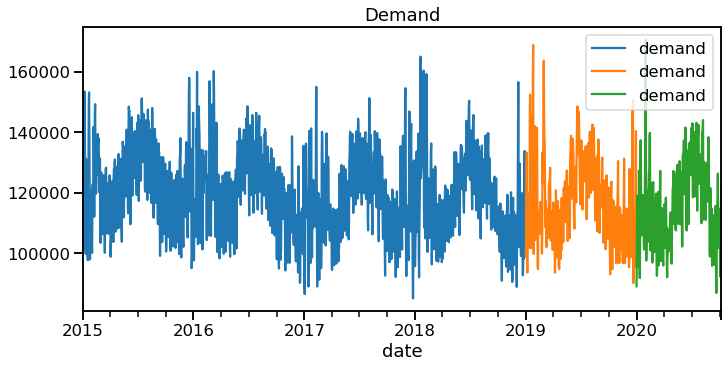

In [25]:
# label 안바뀜
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
df_train.plot(ax=ax,label='train')
df_valid.plot(ax=ax,label='valid')
df_test.plot(ax=ax,label='test')
ax.set_title('Demand')
ax.legend()

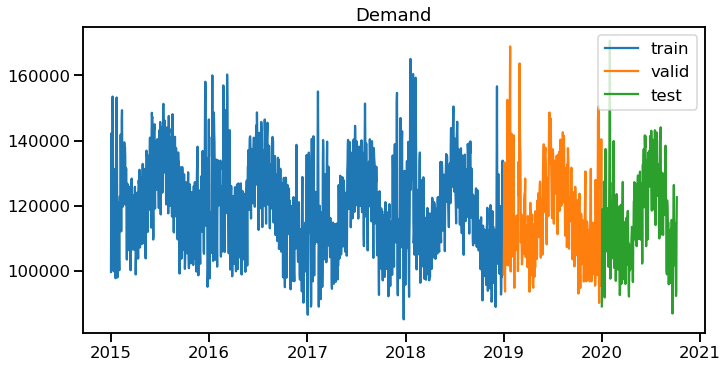

In [28]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_train.index, df_train['demand'],label='train')
ax.plot(df_valid.index, df_valid['demand'], label='valid')
ax.plot(df_test.index, df_test['demand'], label='test')
ax.set_title('Demand')
ax.legend()

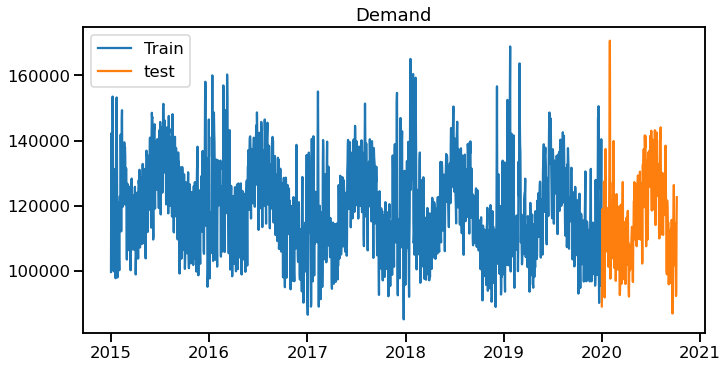

In [30]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_Train.index, df_Train['demand'],label='Train')
ax.plot(df_test.index, df_test['demand'], label='test')
ax.set_title('Demand')
ax.legend()

### school day, holiday
매년 공휴일이 다름

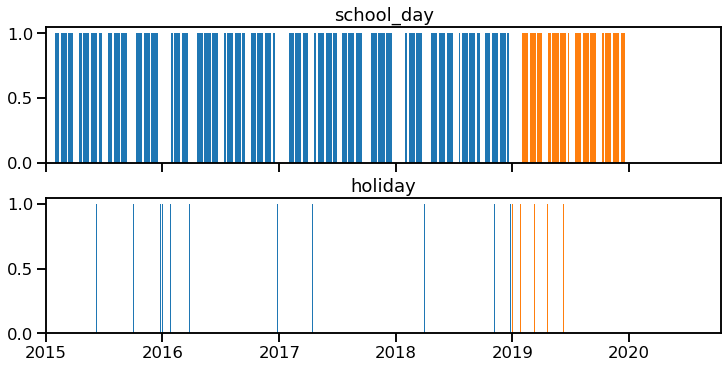

In [38]:
fig, axs = plt.subplots(nrows=2, figsize=(10,5),constrained_layout=True,sharex=True)
for df in [df_train, df_valid]:
    for ax, feature in zip(axs,['school_day','holiday']):
        ax.bar(df.index, df[feature].map({"N":0,"Y":1}))
        ax.set_xlim(datetime.datetime(2015,1,1), datetime.datetime(2020,10,16))
        ax.set_title(feature)

(16436.0, 18551.0)

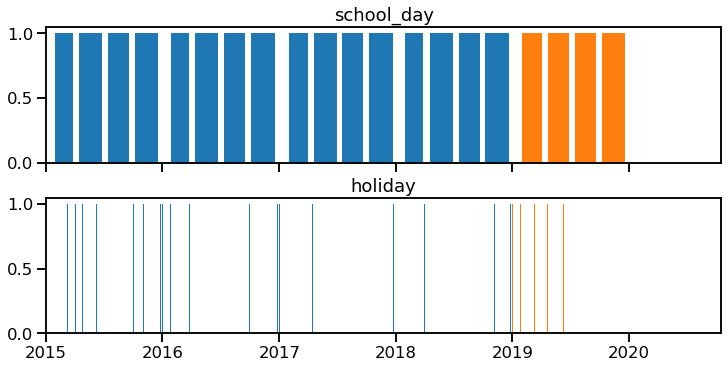

In [39]:
fig, axs = plt.subplots(nrows=2, figsize=(10,5),constrained_layout=True,sharex=True)
for df in [df_train, df_valid]:
    for ax, feature in zip(axs,['school_day','holiday']):
        ax.bar(df.index, df[feature].map({"N":0,"Y":1}),width=1)
        ax.set_title(feature)
axs[0].set_xlim(datetime.datetime(2015,1,1), datetime.datetime(2020,10,16))

## Noise Reduction

### week_resample

In [45]:
df_train_w = df_train.resample('w').mean()
df_train_w

,demand
date,
2015-01-04,118968.073750
2015-01-11,124149.390000
2015-01-18,115676.021429
2015-01-25,128593.018571
2015-02-01,111894.315000
...,...
2018-12-09,121301.250000
2018-12-16,111661.818571
2018-12-23,106831.047857


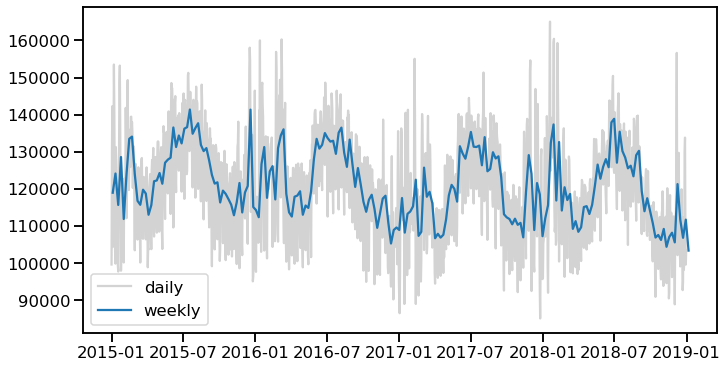

In [47]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_train.index, df_train['demand'], label='daily',color='lightgray')
ax.plot(df_train_w.index, df_train_w['demand'],label='weekly')
ax.legend()

### monthly_resample

In [49]:
df_train_m = df_train.resample('M').mean()
df_train_m.head()

,demand
date,
2015-01-31,120576.860323
2015-02-28,128754.107679
2015-03-31,117730.704839
2015-04-30,119606.603500
2015-05-31,125072.101935


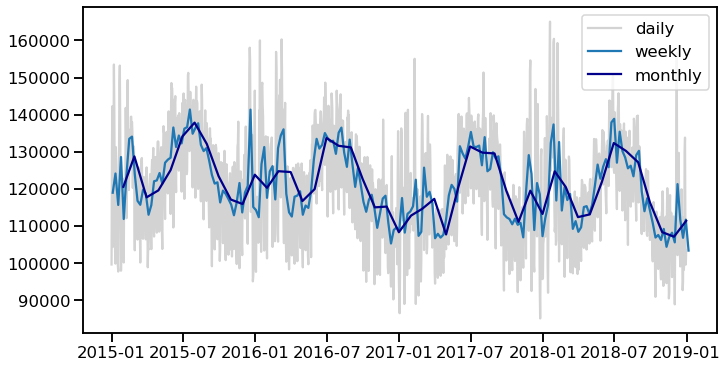

In [52]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_train.index, df_train['demand'], label='daily',color='lightgray')
ax.plot(df_train_w.index, df_train_w['demand'],label='weekly')
ax.plot(df_train_m.index, df_train_m['demand'],label='monthly',color='darkblue')
ax.legend(loc='upper right')

## Trend Searching
왜 하는지 잘 모르겠음

## Stationary

In [53]:
df_train['demand_diff'] = df_train['demand'].diff()
df_train[['demand','demand_diff']]

,demand,demand_diff
date,,
2015-01-01,99635.030,NaN
2015-01-02,129606.010,29970.980
2015-01-03,142300.540,12694.530
2015-01-04,104330.715,-37969.825
2015-01-05,118132.200,13801.485
...,...,...
2018-12-27,129749.140,29731.945
2018-12-28,133831.375,4082.235
2018-12-29,108290.110,-25541.265


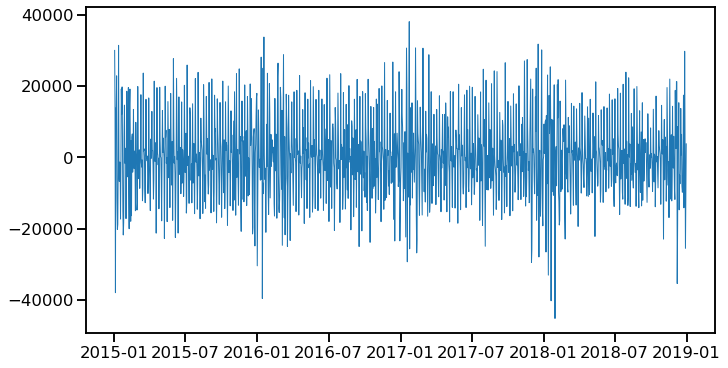

In [56]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_train.index, df_train['demand_diff'],lw=1)

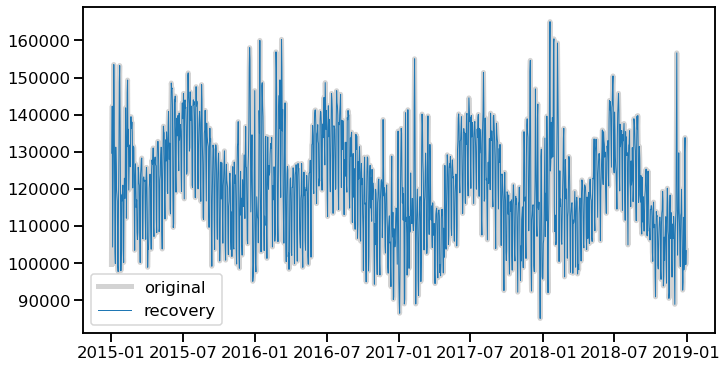

In [61]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_train.index, df_train['demand'],color='lightgray',lw=5,label='original')
ax.plot(df_train.index, df_train['demand_diff'].cumsum()+ df_train['demand'].iloc[0],lw=1,label='recovery')
ax.legend()